In [1]:
# Setup
import IPython

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_dir = '../data/'

## 1. Reading Metadata File

In [3]:
# Read the original metadata file as a pandas dataframe and view the top 5 rows of the dataset

metadata = pd.read_csv(f'{data_dir}/metadata/sample_metadata.tsv', sep='\t')
metadata.head()

,sampleid,stool_consistency,hct_source,disease,categorical_time_relative_to_engraftment,week_relative_to_hct,timepoint_of_transplant,day_relative_to_nearest_hct,alleged_abduction
0,N4VICF,formed,cord,Myelodysplastic Syndromes,pre,-1.0,6.0,-6.0,0
1,8A0F9A,formed,cord,Leukemia,pre,-2.0,7.0,-7.0,0
2,5Y49IM,semi-formed,cord,Leukemia,peri,-1.0,7.0,0.0,1
3,ZKJI45,semi-formed,cord,Leukemia,post,1.0,7.0,8.0,0
4,2I7SIQ,liquid,cord,Leukemia,peri,-1.0,0.0,0.0,1


In [4]:
# For clearer understanding and better downstream anlysis
# Convert the type of "week_relative_to_hct" and "alleged_abduction" columns to be string

metadata['alleged_abduction']= metadata['alleged_abduction'].values.astype(str)
metadata['alleged_abduction'] = metadata['alleged_abduction'].str.replace('0','non_abducted')
metadata['alleged_abduction'] = metadata['alleged_abduction'].str.replace('1','abducted')
metadata['week_relative_to_hct']= metadata['week_relative_to_hct'].values.astype(str)
metadata['week_relative_to_hct']= metadata['week_relative_to_hct'].str.replace('-1.0','one week before HCT', regex=False)
metadata['week_relative_to_hct']= metadata['week_relative_to_hct'].str.replace('-2.0','two weeks before HCT', regex=False)
metadata['week_relative_to_hct']= metadata['week_relative_to_hct'].str.replace('1.0','one week after HCT', regex=False)
metadata['week_relative_to_hct']= metadata['week_relative_to_hct'].str.replace('2.0','two weeks after HCT', regex=False)
metadata['week_relative_to_hct']= metadata['week_relative_to_hct'].str.replace('0.0','HCT week', regex=False)
metadata['week_relative_to_hct']= metadata['week_relative_to_hct'].str.replace('nan','', regex=False)

In [5]:
# Read the new metadata file "str_metadata"
metadata.to_csv(f'{data_dir}/metadata/str_metadata.tsv', sep='\t', encoding='utf-8', escapechar='\n', index=False)
df_meta = pd.read_csv(f'{data_dir}/metadata/str_metadata.tsv', sep='\t')

# Get the data from specific columns
df_meta[["week_relative_to_hct", "alleged_abduction"]].head(2)

,week_relative_to_hct,alleged_abduction
0,-1.0,0
1,-2.0,0


In [6]:
df_meta.shape

(161, 9)

In [7]:
# List all the columns as a list

df_meta.columns.tolist()

['sampleid',
 'stool_consistency',
 'hct_source',
 'disease',
 'categorical_time_relative_to_engraftment',
 'week_relative_to_hct',
 'timepoint_of_transplant',
 'day_relative_to_nearest_hct',
 'alleged_abduction']

In [8]:
# Print the number of unique elements in each column

for column_name in df_meta:
    print(f'{column_name}: {len(df_meta[column_name].unique())} unique elements')

sampleid: 161 unique elements
stool_consistency: 3 unique elements
hct_source: 3 unique elements
disease: 5 unique elements
categorical_time_relative_to_engraftment: 4 unique elements
week_relative_to_hct: 6 unique elements
timepoint_of_transplant: 15 unique elements
day_relative_to_nearest_hct: 25 unique elements
alleged_abduction: 2 unique elements


## 2. Investigating Metadata Dataframe

In [9]:
# Check if all the samples are unique/if sample collection is correct

len(df_meta['sampleid'].unique())

161

In [10]:
# Count the number of missing data in each column
df_meta.isnull().sum()

sampleid                                    0
stool_consistency                           0
hct_source                                  4
disease                                     4
categorical_time_relative_to_engraftment    4
week_relative_to_hct                        4
timepoint_of_transplant                     4
day_relative_to_nearest_hct                 4
alleged_abduction                           0
dtype: int64

In [11]:
# Find out which rows that the missing data belong to

df_null = df_meta.isnull().sum(axis=1)
print(df_null[df_null > 0])

47    6
48    6
49    6
50    6
dtype: int64


### 2.1 For each column, how many different types/values were evaluated in how many samples?

#### 2.1.1 Stool Consistency

In [12]:
df_meta['stool_consistency'].value_counts()

formed         74
liquid         45
semi-formed    42
Name: stool_consistency, dtype: int64

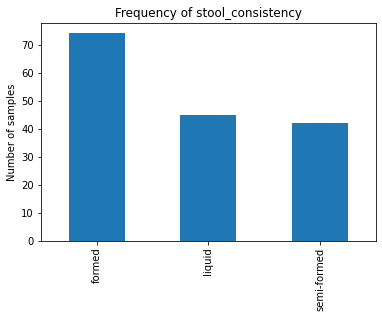

In [13]:
df_meta['stool_consistency'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of stool_consistency')
plt.show()

In [8]:
# Groupby `stool consistency` and `categorical time relative to engraftment` columns

df_stool_engraft = df_meta[['stool_consistency', 'categorical_time_relative_to_engraftment', 'sampleid']]
df_stool_engraft = df_stool_engraft.groupby(['stool_consistency', 'categorical_time_relative_to_engraftment']).count()
df_stool_engraft

sampleid
stool_consistency categorical_time_relative_to_engraftment          
formed            peri                                             9
                  post                                            14
                  pre                                             47
liquid            peri                                            11
                  post                                            27
                  pre                                              7
semi-formed       peri                                             7
                  post                                            19
                  pre                                             16

In [11]:
# Groupby `stool consistency` and `week relative to hct` columns

df_stool_hct = df_meta[['stool_consistency', 'week_relative_to_hct', 'sampleid']]
df_stool_hct = df_stool_hct.groupby(['stool_consistency', 'week_relative_to_hct']).count()
df_stool_hct

sampleid
stool_consistency week_relative_to_hct          
formed            -2.0                         9
                  -1.0                        43
                   0.0                         8
                   1.0                         7
                   2.0                         3
liquid            -1.0                        11
                   0.0                        12
                   1.0                        20
                   2.0                         2
semi-formed       -1.0                        17
                   0.0                         8
                   1.0                        13
                   2.0                         4

#### 2.1.2 HCT Source (4 missing)

In [14]:
df_meta['hct_source'].value_counts()

PBSC_unmodified    88
cord               69
Name: hct_source, dtype: int64

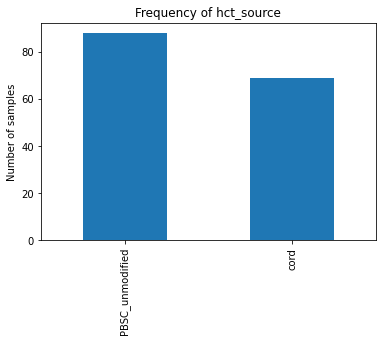

In [15]:
df_meta['hct_source'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of hct_source')
plt.show()

#### 2.1.3 Disease (4 missing)

In [16]:
df_meta['disease'].value_counts()

Leukemia                     79
Non-Hodgkin's Lymphoma       60
Hodgkin's Disease            12
Myelodysplastic Syndromes     6
Name: disease, dtype: int64

In [17]:
# The number of patients with a specific disease based on alleged_abduction status

df_meta.groupby(['disease', 'alleged_abduction']).size()

disease                    alleged_abduction
Hodgkin's Disease          abducted              1
                           non_abducted         11
Leukemia                   abducted             19
                           non_abducted         60
Myelodysplastic Syndromes  abducted              1
                           non_abducted          5
Non-Hodgkin's Lymphoma     abducted              5
                           non_abducted         55
dtype: int64

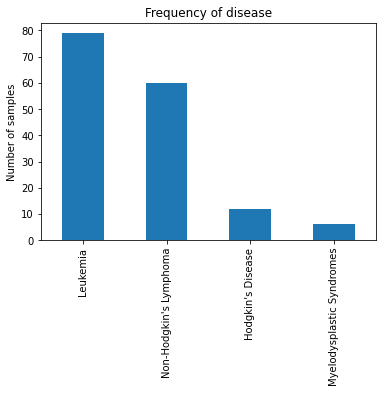

In [18]:
df_meta['disease'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of disease')
plt.show()

#### 2.1.4 Categorical Time Relative To Engraftment (4 missing)

In [19]:
df_meta['categorical_time_relative_to_engraftment'].value_counts()

pre     70
post    60
peri    27
Name: categorical_time_relative_to_engraftment, dtype: int64

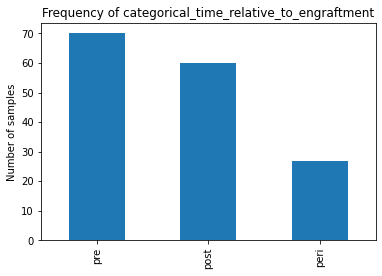

In [20]:
df_meta['categorical_time_relative_to_engraftment'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of categorical_time_relative_to_engraftment')
plt.show()

#### 2.1.5 Week Relative To First HCT (4 missing)

In [21]:
df_meta['week_relative_to_hct'].value_counts()

one week before HCT     71
one week after HCT      40
HCT week                28
two weeks after HCT      9
two weeks before HCT     9
Name: week_relative_to_hct, dtype: int64

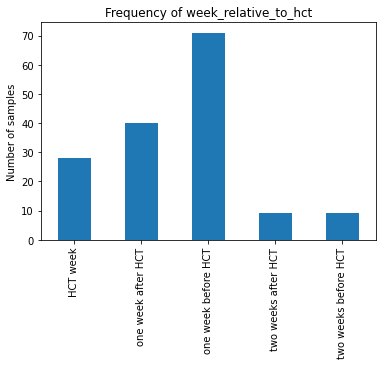

In [22]:
df_week_plot = df_meta['week_relative_to_hct'].value_counts()
df_week_plot = df_week_plot.sort_index()
df_week_plot.plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of week_relative_to_hct')
plt.show()

#### 2.1.6 Day Relative To Nearest HCT (4 missing)

In [23]:
df_meta['day_relative_to_nearest_hct'].value_counts()

-2.0     15
-5.0     14
-6.0     12
-3.0     11
 12.0    11
 0.0     10
 13.0    10
 11.0     8
 5.0      6
 7.0      6
 15.0     5
-1.0      5
 6.0      5
 8.0      5
-9.0      5
 3.0      4
-4.0      4
-7.0      4
 4.0      4
 16.0     4
 1.0      3
 14.0     3
 9.0      2
 10.0     1
Name: day_relative_to_nearest_hct, dtype: int64

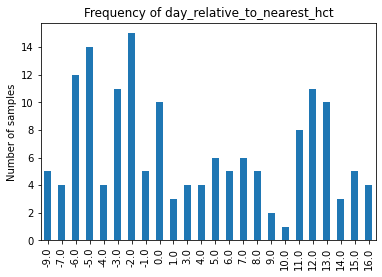

In [24]:
df_day_plot = df_meta['day_relative_to_nearest_hct'].value_counts()
df_day_plot = df_day_plot.sort_index()
df_day_plot.plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of day_relative_to_nearest_hct')
plt.show()

#### 2.1.7 Alleged Abduction

In [25]:
df_meta['alleged_abduction'].value_counts()

non_abducted    135
abducted         26
Name: alleged_abduction, dtype: int64

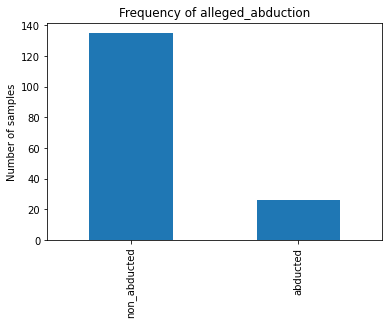

In [26]:
df_meta['alleged_abduction'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of alleged_abduction')
plt.show()

#### Summary of all columns

In [27]:
for column_name in df_meta:
    if column_name != 'sampleid':
        print(column_name)
        print(df_meta[column_name].value_counts())

stool_consistency
formed         74
liquid         45
semi-formed    42
Name: stool_consistency, dtype: int64
hct_source
PBSC_unmodified    88
cord               69
Name: hct_source, dtype: int64
disease
Leukemia                     79
Non-Hodgkin's Lymphoma       60
Hodgkin's Disease            12
Myelodysplastic Syndromes     6
Name: disease, dtype: int64
categorical_time_relative_to_engraftment
pre     70
post    60
peri    27
Name: categorical_time_relative_to_engraftment, dtype: int64
week_relative_to_hct
one week before HCT     71
one week after HCT      40
HCT week                28
two weeks after HCT      9
two weeks before HCT     9
Name: week_relative_to_hct, dtype: int64
timepoint_of_transplant
6.0      51
5.0      36
3.0      13
7.0      12
9.0       9
2.0       7
1.0       7
0.0       5
4.0       5
52.0      3
363.0     3
379.0     2
14.0      2
24.0      2
Name: timepoint_of_transplant, dtype: int64
day_relative_to_nearest_hct
-2.0     15
-5.0     14
-6.0     12
-3.0    

### 2.2 Testing Possible Inconsistencies Within The Metadata File

During our group discussion, we observed that there may be some inconsistent points in the "categorical_time_relative_to_engraftment", "week_relative_to_hct", and "day_relative_to_nearest_hct" columns. For example, we know that engraftment happens after the HCT. So if the categorical time is "peri", it means the patient should have had the HCT already. And this should correspond to a non-negative value in the "week_relative_to_hct" column. However, "peri" only corresponds to "-1" and "0" in the "week" column. The other inconsistency is that some values in the "week" and "day" columns can not correspond to each other.

We speculated that it resulted from record errors or that some patients had multiple hematopoietic stem cell transplantations.

To test our assumptions, we perform the following data analysis to determine the number of inconsistent data in these three columns, decide on which column to pick when we encounter inconsistencies, and to see which patients had more than one HCT.

In [28]:
# For simplicity, here we create a sub dataframe that contains only
# the three columns we care about

df_meta_short = df_meta[['categorical_time_relative_to_engraftment', 'week_relative_to_hct', 'day_relative_to_nearest_hct']]
df_meta_short.head()

,categorical_time_relative_to_engraftment,week_relative_to_hct,day_relative_to_nearest_hct
0,pre,one week before HCT,-6.0
1,pre,two weeks before HCT,-7.0
2,peri,one week before HCT,0.0
3,post,one week after HCT,8.0
4,peri,one week before HCT,0.0


In [29]:
# For better observation
# Set the 'categorical_time_relative_to_engraftment' column as the index
# Display the full dataframe

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_meta_subs = df_meta_short.set_index(['categorical_time_relative_to_engraftment'])
df_meta_subs.sort_index()

,week_relative_to_hct,day_relative_to_nearest_hct
categorical_time_relative_to_engraftment,,
peri,one week before HCT,0.0
peri,one week before HCT,0.0
peri,HCT week,4.0
peri,HCT week,4.0
peri,HCT week,3.0
peri,HCT week,1.0
peri,HCT week,5.0
peri,HCT week,5.0
peri,HCT week,3.0


In [30]:
# Change column names to simpler ones
# Check the range of values in the 'day_relative_to_nearest_hct' column

df_meta_short = df_meta_short.rename(columns={'categorical_time_relative_to_engraftment': 'cat', 'week_relative_to_hct': 'week', 'day_relative_to_nearest_hct': 'day_nearest'})
new_group = df_meta_short.groupby(['cat', 'week']).agg(['min', 'max'])
print(new_group)

                          day_nearest      
                                  min   max
cat  week                                  
peri HCT week                     1.0   5.0
     one week before HCT          0.0   0.0
post HCT week                     6.0   7.0
     one week after HCT           8.0  14.0
     two weeks after HCT         15.0  16.0
pre  one week before HCT         -6.0  -1.0
     two weeks before HCT        -9.0  -7.0


**Comments:**

From the output, We found that these three columns correspond well to one another as the ranges of values are perfectly continuous. We think "peri-engraftment" with -1 week relative to first hct refers to a specific situation that these patients had HCT on the same day as their samples were collected, and this was possibly defined by the data collectors. And peri-engraftment is a period of 5 days after the HCT. (not sure)

Also, we can conclude that none of our sampled patients have had multiple HCTs, since the "day" column corresponds well to the "week" column.

This indicates information redundancy in the metadata. We suggest that paying more attention the "day" column in our further work, because it is more precise. It has larger range of numbers and may be better for regression analysis.

## 3. Finding Associations Within Metadata 
### 3.1 Link `HCT time` with `Alleged Abduction`

To find out how many people claimed being abducted by aliens before/after their first HCT

In [31]:
# Groupby `week` and `abduction` columns

df_ab_samples_1 = df_meta[['week_relative_to_hct', 'alleged_abduction', 'sampleid']]
df_ab_samples_1 = df_ab_samples_1.groupby(['week_relative_to_hct', 'alleged_abduction']).count()
df_ab_samples_1

# A histogram to show distributions can be found in the "src-plots/metadata_plots"

sampleid
week_relative_to_hct alleged_abduction          
HCT week             abducted                  3
                     non_abducted             25
one week after HCT   abducted                 12
                     non_abducted             28
one week before HCT  abducted                  8
                     non_abducted             63
two weeks after HCT  abducted                  3
                     non_abducted              6
two weeks before HCT non_abducted              9

In [32]:
# Groupby `categorical time` and `abduction` columns

df_ab_samples_2 = df_meta[['categorical_time_relative_to_engraftment', 'alleged_abduction', 'sampleid']]
df_ab_samples_2 = df_ab_samples_2.groupby(['categorical_time_relative_to_engraftment', 'alleged_abduction']).count()
df_ab_samples_2

# A histogram to show distributions can be found in the "src-plots/metadata_plots"

sampleid
categorical_time_relative_to_engraftment alleged_abduction          
peri                                     abducted                  3
                                         non_abducted             24
post                                     abducted                 17
                                         non_abducted             43
pre                                      abducted                  6
                                         non_abducted             64

### 3.2 Link `Disease` with `Alleged Abduction`

In [33]:
df_ab_samples_3 = df_meta[['disease', 'alleged_abduction', 'sampleid']]
df_ab_samples_3 = df_ab_samples_3.groupby(['disease', 'alleged_abduction']).count()
df_ab_samples_3

# A histogram to show distributions can be found in the "src-plots/metadata_plots"

sampleid
disease                   alleged_abduction          
Hodgkin's Disease         abducted                  1
                          non_abducted             11
Leukemia                  abducted                 19
                          non_abducted             60
Myelodysplastic Syndromes abducted                  1
                          non_abducted              5
Non-Hodgkin's Lymphoma    abducted                  5
                          non_abducted             55

### 3.3 Link `HCT Source` with `Alleged Abduction`

In [34]:
df_ab_samples_4 = df_meta[['hct_source', 'alleged_abduction', 'sampleid']]
df_ab_samples_4 = df_ab_samples_4.groupby(['hct_source', 'alleged_abduction']).count()
df_ab_samples_4

# A histogram to show distributions can be found in the "src-plots/metadata_plots"

sampleid
hct_source      alleged_abduction          
PBSC_unmodified abducted                 16
                non_abducted             72
cord            abducted                 10
                non_abducted             59

### 3.4 Link `Stool Consistency` with `Alleged abduction`

In [35]:
df_ab_samples_5 = df_meta[['stool_consistency', 'alleged_abduction', 'sampleid']]
df_ab_samples_5 = df_ab_samples_5.groupby(['stool_consistency', 'alleged_abduction']).count()
df_ab_samples_5

# A histogram to show distributions can be found in the "src-plots/metadata_plots"

sampleid
stool_consistency alleged_abduction          
formed            abducted                  8
                  non_abducted             66
liquid            abducted                  9
                  non_abducted             36
semi-formed       abducted                  9
                  non_abducted             33

### 3.5 Link `HCT Time` with `Disease`

In [36]:
# Groupby `categorical time` and `disease` columns

df_dis_samples = df_meta[['categorical_time_relative_to_engraftment', 'disease', 'sampleid']]
df_dis_samples = df_dis_samples.groupby(['categorical_time_relative_to_engraftment', 'disease']).count()
df_dis_samples

sampleid
categorical_time_relative_to_engraftment disease                            
peri                                     Hodgkin's Disease                 3
                                         Leukemia                         14
                                         Non-Hodgkin's Lymphoma           10
post                                     Hodgkin's Disease                 5
                                         Leukemia                         25
                                         Myelodysplastic Syndromes         3
                                         Non-Hodgkin's Lymphoma           27
pre                                      Hodgkin's Disease                 4
                                         Leukemia                         40
                                         Myelodysplastic Syndromes         3
                                         Non-Hodgkin's Lymphoma           23

In [37]:
# Groupby `week` and `disease` columns

df_dis_samples_2 = df_meta[['week_relative_to_hct', 'disease', 'sampleid']]
df_dis_samples_2 = df_dis_samples_2.groupby(['week_relative_to_hct', 'disease']).count()
df_dis_samples_2

sampleid
week_relative_to_hct disease                            
HCT week             Hodgkin's Disease                 2
                     Leukemia                         14
                     Myelodysplastic Syndromes         2
                     Non-Hodgkin's Lymphoma           10
one week after HCT   Hodgkin's Disease                 5
                     Leukemia                         17
                     Myelodysplastic Syndromes         1
                     Non-Hodgkin's Lymphoma           17
one week before HCT  Hodgkin's Disease                 4
                     Leukemia                         38
                     Myelodysplastic Syndromes         3
                     Non-Hodgkin's Lymphoma           26
two weeks after HCT  Leukemia                          5
                     Non-Hodgkin's Lymphoma            4
two weeks before HCT Hodgkin's Disease                 1
                     Leukemia                          5
                     Non-Hodgkin's Lymphoma            3

## 4. Reference Reading

Attached is a reference reading I found about hct:</mark>
https://www.nature.com/articles/nrc.2018.10